In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("../Dataset/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
print("dataframe shape is : ",df.shape)
print("dataset length : ",len(df))

dataframe shape is :  (891, 12)
dataset length :  891


In [3]:
df = df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns')

df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [4]:
from sklearn.preprocessing import LabelEncoder

lc_sex = LabelEncoder()

In [5]:
df['Sex'] = lc_sex.fit_transform(df['Sex'])

In [6]:
x = df.drop(['Survived'],axis='columns')
y = df['Survived']

x


,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500
...,...,...,...,...
886,2,1,27.0,13.0000
887,1,0,19.0,30.0000
888,3,0,NaN,23.4500
889,1,1,26.0,30.0000


In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=23)
x_train

,Pclass,Sex,Age,Fare
387,2,0,36.0,13.0000
603,3,1,44.0,8.0500
691,3,0,4.0,13.4167
202,3,1,34.0,6.4958
280,3,1,65.0,7.7500
...,...,...,...,...
31,1,0,NaN,146.5208
488,3,1,30.0,8.0500
40,3,0,40.0,9.4750
742,1,0,21.0,262.3750


[Text(0.5, 0.875, 'x[1] <= 0.5\nentropy = 0.969\nsamples = 623\nvalue = [376.0, 247.0]'),
 Text(0.25, 0.625, 'x[0] <= 2.5\nentropy = 0.818\nsamples = 232\nvalue = [59.0, 173.0]'),
 Text(0.125, 0.375, 'x[2] <= 2.5\nentropy = 0.31\nsamples = 126\nvalue = [7, 119]'),
 Text(0.0625, 0.125, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1875, 0.125, 'entropy = 0.28\nsamples = 124\nvalue = [6, 118]'),
 Text(0.375, 0.375, 'x[3] <= 22.904\nentropy = 1.0\nsamples = 106\nvalue = [52, 54]'),
 Text(0.3125, 0.125, 'entropy = 0.953\nsamples = 83\nvalue = [31, 52]'),
 Text(0.4375, 0.125, 'entropy = 0.426\nsamples = 23\nvalue = [21, 2]'),
 Text(0.75, 0.625, 'x[0] <= 1.5\nentropy = 0.7\nsamples = 391\nvalue = [317, 74]'),
 Text(0.625, 0.375, 'x[2] <= 53.0\nentropy = 0.954\nsamples = 80\nvalue = [50, 30]'),
 Text(0.5625, 0.125, 'entropy = 0.989\nsamples = 66\nvalue = [37, 29]'),
 Text(0.6875, 0.125, 'entropy = 0.371\nsamples = 14\nvalue = [13, 1]'),
 Text(0.875, 0.375, 'x[2] <= 13.0\nentropy = 0.

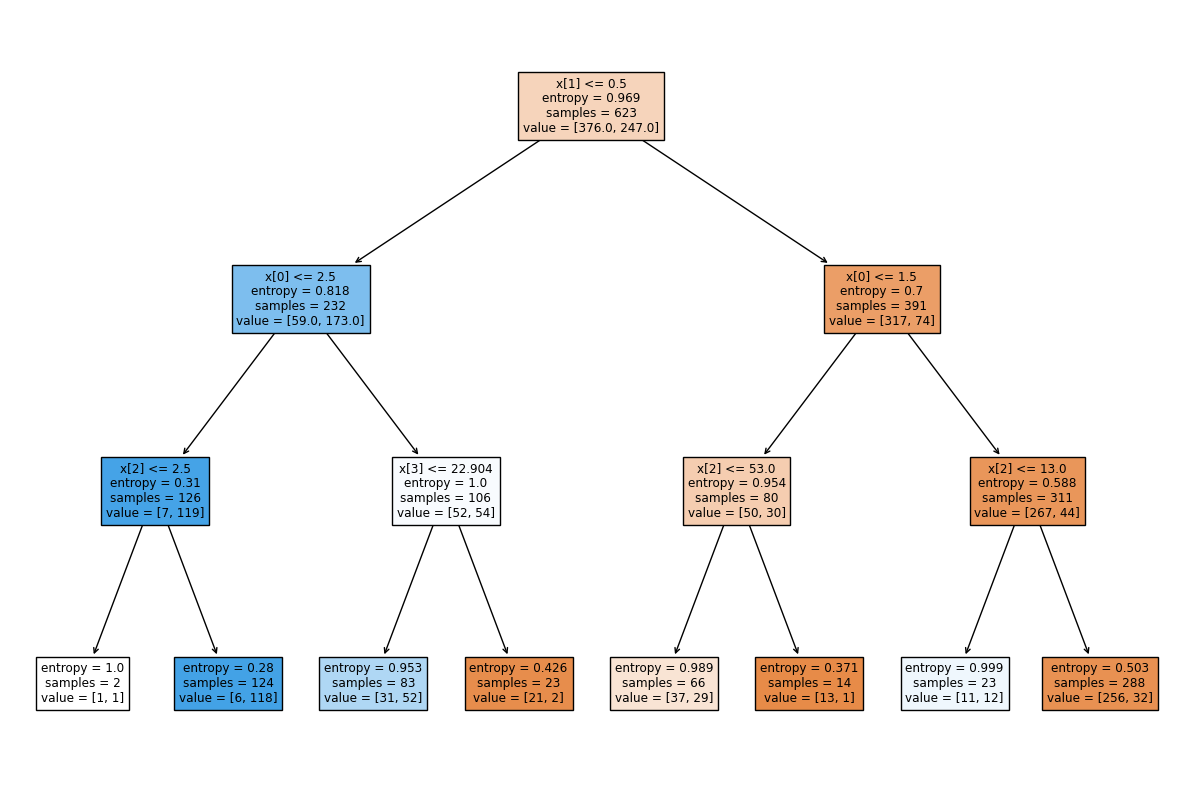

In [8]:
from sklearn import tree
import matplotlib.pyplot as plt 

clf_entropy = tree.DecisionTreeClassifier(criterion="entropy",max_depth=3,random_state=23)
clf_entropy.fit(x_train,y_train)
plt.figure(figsize=(15,10))
tree.plot_tree(clf_entropy,filled=True)


In [28]:
y_predict_train = clf_entropy.predict(x_train)
y_predict_train

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,

In [30]:
from sklearn.metrics import accuracy_score

print("accuracy is : ",accuracy_score(y_train,y_predict_train)*100)

accuracy is :  81.86195826645265


In [31]:
y_predict_train , y_train

(array([1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
        0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
        0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 